## Predict Food Delivery Time using XGBoost

In [36]:
import xgboost as xg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance

### #1 Import the data and set the variables

In [37]:
df = pd.read_csv('../Dataset/Food_Delivery_Times_Cleaned.csv')
X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']

### #2 Divide our data and train the model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_reg = xg.XGBRegressor(objective = 'reg:squarederror',random_state=42, n_estimators = 100, n_jobs = -1, learning_rate = 0.1, max_depth = 5)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

### #3 Make our predictions

In [39]:
xgb_prediction = xgb_reg.predict(X_test)

### #4 Visualize and compare our predictions

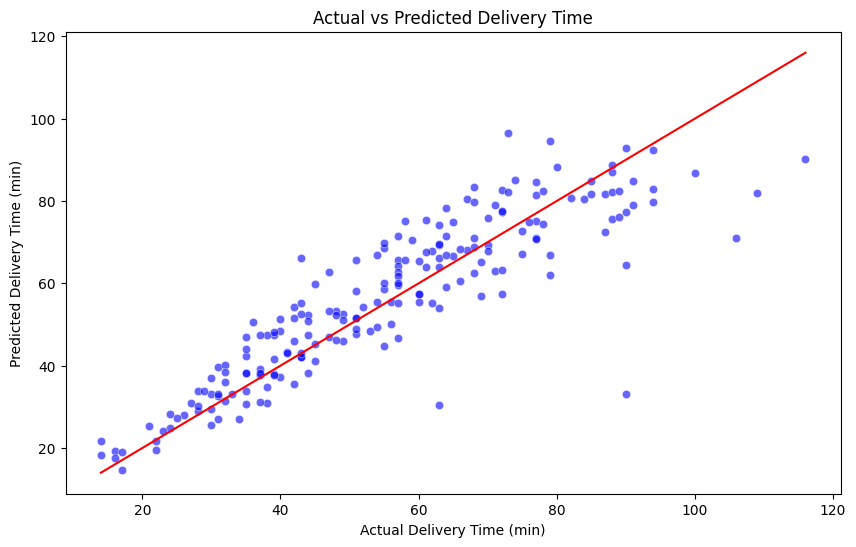

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=xgb_prediction, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='solid')
plt.xlabel('Actual Delivery Time (min)')
plt.ylabel('Predicted Delivery Time (min)')
plt.title('Actual vs Predicted Delivery Time')
plt.show()

### #5 Calculate the MAE and RMSE error and visualize it

Mean Absolute Error: 6.94 min
Root Mean Squared Error: 9.77 min


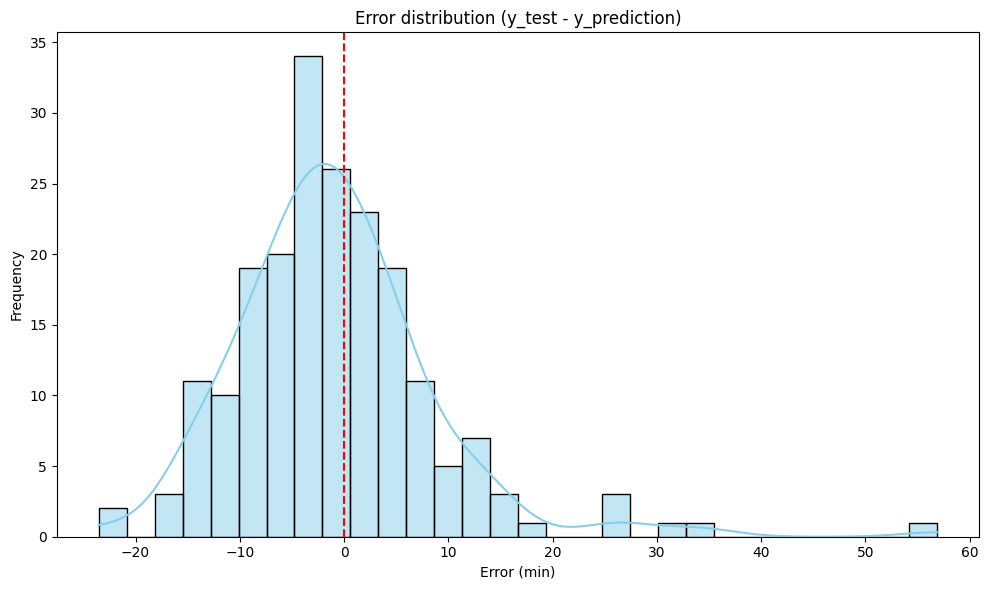

In [41]:
mae = mean_absolute_error(y_test, xgb_prediction)
rmse = np.sqrt(mean_squared_error(y_test, xgb_prediction))
print(f'Mean Absolute Error: {mae:.2f} min')
print(f'Root Mean Squared Error: {rmse:.2f} min')

residuals = y_test - xgb_prediction

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue', bins=30)
plt.title("Error distribution (y_test - y_prediction)")
plt.xlabel("Error (min)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--') 
plt.tight_layout()
plt.show()

### #6 Which features has influenced the most in the predictions

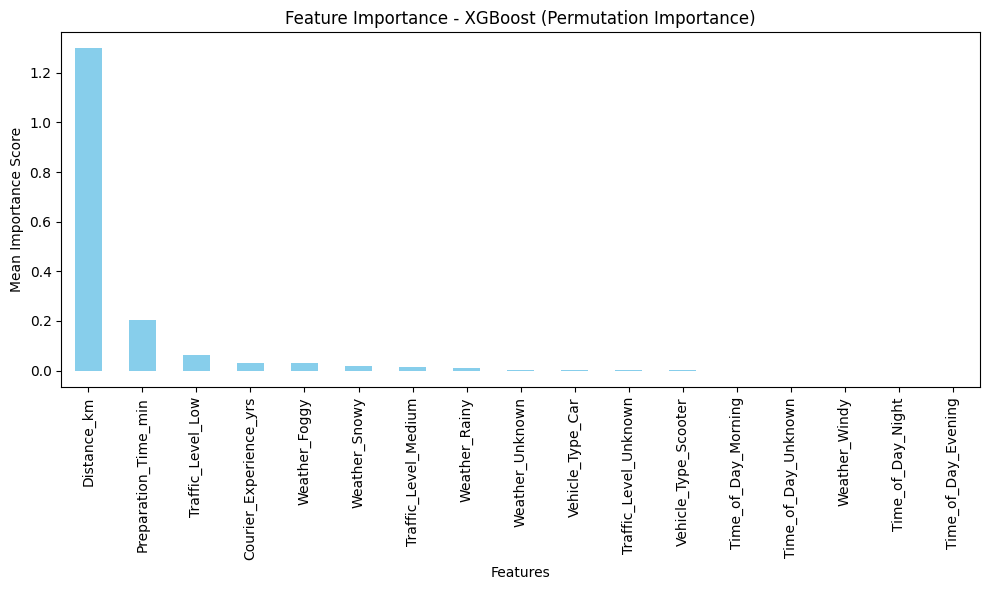

In [42]:
important_features = permutation_importance(xgb_reg, X_test, y_test, n_repeats=30, random_state=42)
importance=pd.Series(important_features.importances_mean, index=X_test.columns)
importance.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance - XGBoost (Permutation Importance)')
plt.xlabel('Features')
plt.ylabel('Mean Importance Score')
plt.tight_layout()
plt.show()